<a href="https://colab.research.google.com/github/dragonflyjt/dragonflyjt.github.io/blob/main/1006392_VerilogGitHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup

In [2]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Homework

Copy this ipynb to your Github and link to Google Colab for Verilog HDL simulation.

Submit the copy of ipynb with complete solution to the DSL Edimension: Homework Submission.

# Q1-Decade Counter

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the decade_counter as shown below using if-else statements.
3. Submit this file to DSL edimension for assessment;
4. The specification of the decade_counter are:
  - When "rst" is high, the output "count" and output "ten" are set to ‘0’ immediately and counting is disabled.
  - When "rst" is low, the circuit increments on every positive edge of the clk.
  - The highest count that can be reached is 4'b1001, after which the count will restart from 4'b0000 again.
  - Only when the count is 4'b1001, the output ten is set to ‘1’ else the output ten will always be set to ‘0’.

5. Write a Verilog test stimulus module for the decade_counter and verify its proper operation as follows:
  - Create a clock (Period: 20 unit time);
  - Test for reset active;
  - Then test for the counting for 1 complete count cycles ie: counting from 4'b0000 to 4'b1001;
  - Use Weveform Viewer for viewing the inputs and outputs;
  - Here is Verilog code template.

In [31]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter(
    input clk,
    input rst,
    output reg [3:0] count,
    output reg ten
);

always @(posedge clk or posedge rst) begin
    if (rst) begin
        count <= 4'b0000;
        ten   <= 1'b0;
    end else begin
        if (count == 4'b1001) begin
            count <= 4'b0000;
            ten   <= 1'b1;
        end else begin
            count <= count + 1;
            ten   <= 1'b0;
        end
    end
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module decade_counter_tb();

reg clk;
reg rst;
wire [3:0] count;
wire ten;

decade_counter decade_counter_u0(
    .clk(clk),
    .rst(rst),
    .count(count),
    .ten(ten)
);

// Generate a clock with a period of 20 time units
always begin
    #10 clk = ~clk;
end

initial begin
    $monitor("%d clk=%b, rst=%b, count=%b, ten=%b", $time, clk,rst,count,ten);
    $dumpfile("tb.vcd");
    $dumpvars();
    // Initialize clock and assert reset initially
    #0 clk = 0;
    #0 rst = 1;
    #25 rst = 0;  // Hold reset active for a short period, De-assert reset to begin counting

    // Allow enough time for one complete count cycle (0 to 9)
    #200 $finish;
    $dumpoff;
end

endmodule


VCD info: dumpfile tb.vcd opened for output.
                   0 clk=0, rst=1, count=0000, ten=0
                  10 clk=1, rst=1, count=0000, ten=0
                  20 clk=0, rst=1, count=0000, ten=0
                  25 clk=0, rst=0, count=0000, ten=0
                  30 clk=1, rst=0, count=0001, ten=0
                  40 clk=0, rst=0, count=0001, ten=0
                  50 clk=1, rst=0, count=0010, ten=0
                  60 clk=0, rst=0, count=0010, ten=0
                  70 clk=1, rst=0, count=0011, ten=0
                  80 clk=0, rst=0, count=0011, ten=0
                  90 clk=1, rst=0, count=0100, ten=0
                 100 clk=0, rst=0, count=0100, ten=0
                 110 clk=1, rst=0, count=0101, ten=0
                 120 clk=0, rst=0, count=0101, ten=0
                 130 clk=1, rst=0, count=0110, ten=0
                 140 clk=0, rst=0, count=0110, ten=0
                 150 clk=1, rst=0, count=0111, ten=0
                 160 clk=0, rst=0, count=0111, ten=0
 

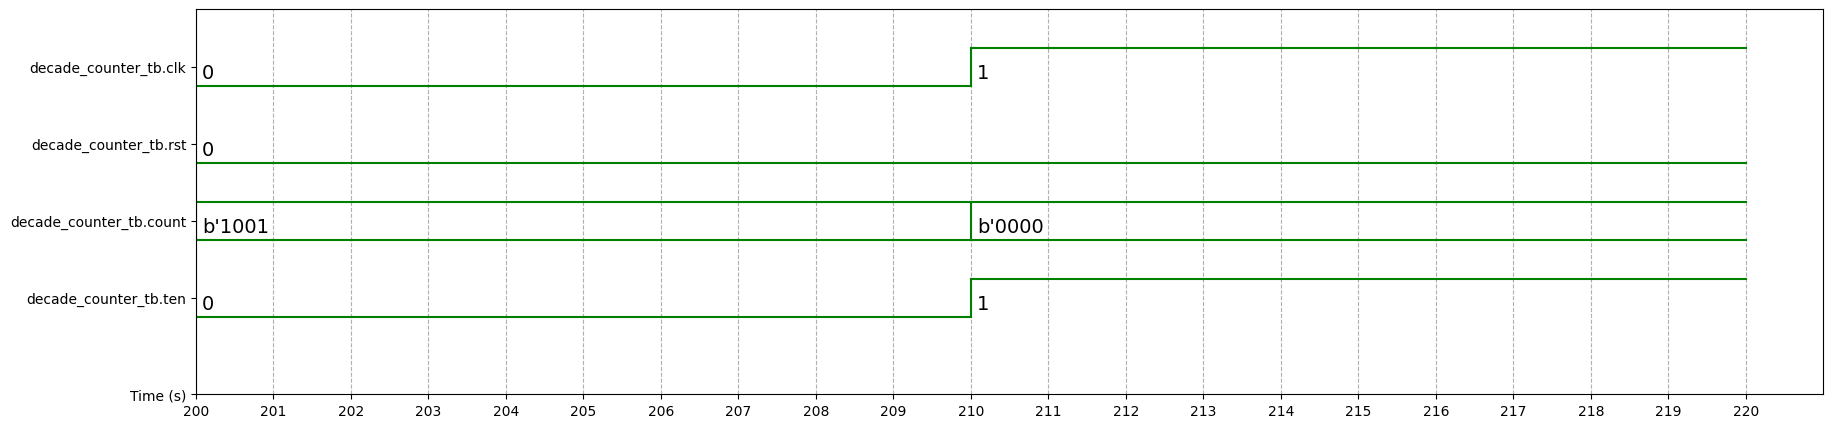

In [32]:
%%waveform tb.vcd
sign_list = ['decade_counter_tb.clk', 'decade_counter_tb.rst','decade_counter_tb.count','decade_counter_tb.ten']
time_begin = 200
time_end = 220
base = 'bin'   # Options: 'bin', 'dec', 'dec2', 'hex', 'octal'

6. The following figure is the test results for reference only. Your results maybe cover more test case if required.

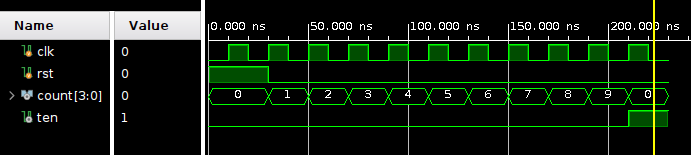

# Q2-Multiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the multiplexer as shown below using case statements.
3. The specifications of the multiplexer are:
  - The circuit is a 4-to-1 multiplexer;
  - The inputs A, B, C, D and output X are all 2-bit vectors;
  - Output X will be equal to either one of the 4 inputs depending on the 4 combinations of 2-bits signal SEL. The following True-table details the relationship between SEL and output X;

| SEL   | OUTPUT X |
|-------|----------|
| 2'b00 | A        |
| 2'b01 | B        |
| 2'b10 | C        |
| 2'b11 | D        |


4. Write a Verilog test stimulus module for the multiplexer;


In [23]:
%%verilog

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer(
    input  [1:0] A,
    input  [1:0] B,
    input  [1:0] C,
    input  [1:0] D,
    input  [1:0] SEL,
    output reg [1:0] X
);

always @(*) begin
    case (SEL)
        2'b00: X = A;
        2'b01: X = B;
        2'b10: X = C;
        2'b11: X = D;
        default: X = 2'b00;
    endcase
end

endmodule
////

//!DO NOT EDIT MODULE NAME AND PORT NAME!
module multiplexer_tb();

reg  [1:0] A;
reg  [1:0] B;
reg  [1:0] C;
reg  [1:0] D;
reg  [1:0] SEL;
wire [1:0] X;

multiplexer multiplexer_u0(
    .A(A),
    .B(B),
    .C(C),
    .D(D),
    .SEL(SEL),
    .X(X)
);

initial begin
    $dumpfile("mux.vcd");
    $dumpvars;

    // Initialize inputs
    A = 2'b00;
    B = 2'b01;
    C = 2'b10;
    D = 2'b11;

    // Test each selector combination
    SEL = 2'b00; // X should be A (00)
    #10;

    SEL = 2'b01; // X should be B (01)
    #10;

    SEL = 2'b10; // X should be C (10)
    #10;

    SEL = 2'b11; // X should be D (11)
    #10;

    $finish;
end

initial begin
    $monitor("Time: %0t, SEL = %b, X = %b", $time, SEL, X);
end

endmodule


VCD info: dumpfile mux.vcd opened for output.
Time: 0, SEL = 00, X = 00
Time: 10, SEL = 01, X = 01
Time: 20, SEL = 10, X = 10
Time: 30, SEL = 11, X = 11



In [30]:
%%waveform tb.vcd
sign_list = ['multiplexer_tb/A', 'multiplexer_tb/B', 'multiplexer_tb/C', 'multiplexer_tb/D', 'multiplexer_tb/SEL', 'multiplexer_tb/X']
time_begin = 0
time_end = 40
base = 'bin'   # Options: 'bin', 'dec', 'dec2', 'hex', 'octal'


KeyError: 'multiplexer_tb/A'

5. Here is a demo testbench result for the multiplexer;

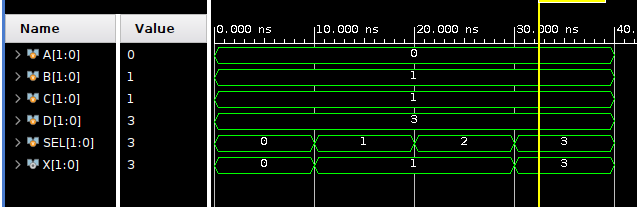

# Q3-Demultiplexer

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the demultiplexer as shown below using case statements. Saved the Verilog description as q3_xxxxxxx.v, and q3_tb_xxxxxxx.v;
3. The specifications of the demultiplexer are:
  - It is a 1-to-4 demultiplexer.
  - Input A and outputs W, X, Y, and Z are all 2-bit vectors.
  - SEL is a 2-bit select input.
  - Each of the 4 combinations of SEL will determine which of the 4 outputs will receive the value of input A.
  - When one output is equal to A, all other outputs are equal to ‘0’.

| SEL   | OUTPUT W | OUTPUT X | OUTPUT Y | OUTPUT Z |
|-------|----------|----------|----------|----------|
| 2'b00 | A        | 2'b00    | 2'b00    | 2'b00    |
| 2'b01 | 2'b00    | A        | 2'b00    | 2'b00    |
| 2'b10 | 2'b00    | 2'b00    | A        | 2'b00    |
| 2'b11 | 2'b00    | 2'b00    | 2'b00    | A        |


4. Write a Verilog test stimulus module for the demultiplexer;





In [ ]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module demultiplexer(
    input [1:0]A,
    input [1:0]SEL,
    output [1:0]W,
    output [1:0]X,
    output [1:0]Y,
    output [1:0]Z
    );

//YOUR CODE HERE

endmodule

//TESTBENCH HERE



5. Here is a demo testbench result for the demultiplexer;

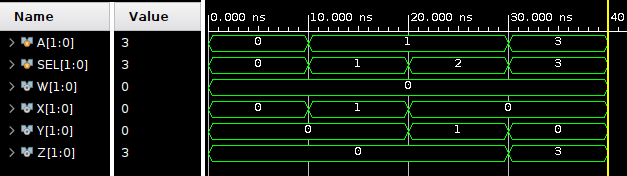

# Q4-Nibbleadd

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the nibbleadd.
3. The specifications for this module nibbleadd are:
  - Inputs A and B are both 8-bit vector inputs. Output q is 5-bit wide.
  - When ctrl input is ‘0’, output is the sum of lowest 4 bits of A and B.
  - When ctrl input is ‘1’, output is the sum of upper 4 bits of A and B.
  - Here is Verilog code template. You have to copy the template into your source file.

4. Write a Verilog test stimulus module for the nibbleadd;

In [ ]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module nibbleadd(
    input [7:0]A,
    input [7:0]B,
    input ctrl,
    output [4:0]q
);


//YOUR CODE HERE
endmodule

//TESTBENCH HERE


In [ ]:
%%waveform ???.vcd

5. Here is a demo testbench result for the nibbleadd;

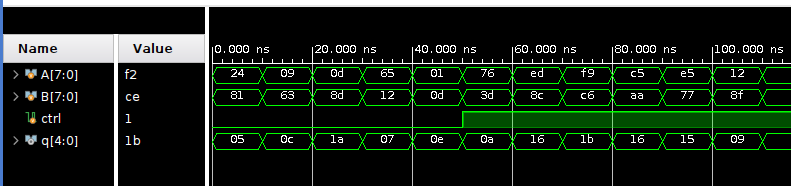

# Q5-CCTA

1. Useful commands: %%verilog, %%waveform
2. Write Verilog source files (module and testbench), description of the CCTA.
3. The specifications for this module CCTA are:
  - Inputs A, B and C are 4-bit vector inputs.
  - Output q is 5-bit wide.
  - rst is active high, when activated q is set to 0;
  - When ctrl input is ‘0’, output q is the sum of A and B.
  - When ctrl input is ‘1’, output q is the difference of A and C.

4. Write a Verilog test stimulus module for the CCTA;

In [ ]:
%%verilog

//!DO NOT MODIFY MODULE NAME AND PORT NAME!
module CCTA(
        input [3:0] A,
        input [3:0] B,
        input [3:0] C,
        input rst,
        input ctrl,
        output [4:0] q
);

endmodule

//TESTBENCH


In [ ]:
%%waveform ???.vcd

5. Here is a demo testbench result for the CCTA;

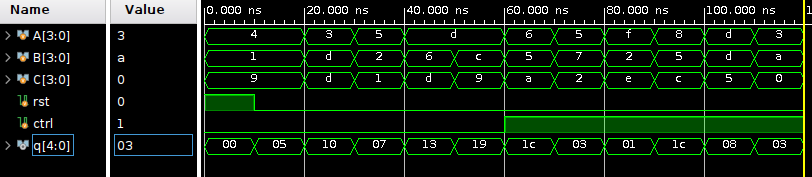